<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 0.1899 0.1899 ... -0.002595
    v10        (latitude, longitude) float32 0.08568 0.08568 ... -0.008725
    sp         (latitude, longitude) float32 1.024e+05 1.024e+05 ... 6.906e+04
Pres MIN 482.53418 Pres MAX 1048.0225
<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 -0.2549 -0.2549 ... 0.7986 0.7986
    v10        (latitude, longitude) float32 -0.08597 -0.08597 ... 0.3818 0.3818
    sp         (latitude, longitude) float32 1.02e+05 1.02e+05 ... 6.888e

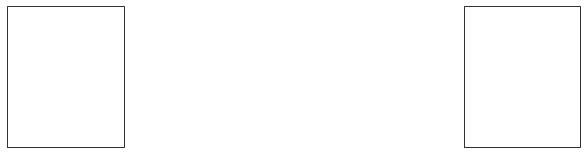

In [1]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]
###ERA 5
# https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html
# https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week8/05_Xarray_TimeSeries.html?highlight=slp
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data='/mnt/g/WRF_Schemes/Era_wrf_data/Era/'   #IAP
#"G:\WRF_Schemes\Era_wrf_data\Era\UV10_mslp_01.nc"
#
#fig=plt.figure(figsize=(18,15),constrained_layout=True)#, dpi=200)
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig.subplots_adjust(wspace=.35)
#fig.tight_layout()
for imonth in np.arange(1,3):  # loop over 2 events 
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fic=rep_data+'eUV10_mslp_'+'{:02d}'.format(imonth)+'.nc'
    ds=xr.open_dataset(fic)
    #ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
    many_times=np.array(['2019-03-15T00:00:00','2019-04-25T15:00:00'],dtype=np.datetime64)
    ds =ds.sel(time=many_times, method='nearest').mean('time')
    print(ds)
    #Read variables
    sp=ds.variables['sp'][:].squeeze()
    u10=ds.variables['u10'][:].squeeze()
    v10=ds.variables['v10'][:].squeeze()
    lons=ds.variables['longitude'][:].squeeze()
    lats=ds.variables['latitude'][:].squeeze()
    
    # Convert kilopascal to hPa 
    smooth_slp = ds.sp/100
    #ax.set_extent([-10.,40.1,30,60],ccrs.PlateCarree())
    print("Pres MIN", np.nanmin(smooth_slp), "Pres MAX", np.nanmax(smooth_slp))
    # Wind Speed 
    wspd = (u10**2 + v10**2)**0.5
    

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 0.1899 0.1899 ... -0.002595
    v10        (latitude, longitude) float32 0.08568 0.08568 ... -0.008725
    sp         (latitude, longitude) float32 1.024e+05 1.024e+05 ... 6.906e+04
Pres MIN 482.53418 Pres MAX 1048.0225
Pres MIN 0.009102244 Pres MAX 24.876217
<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 -0.2549 -0.2549 ... 0.7986 0.7986
    v10        (latitude, longitude) float32 -0.08597 -0.08597 ... 0.3818 0.3818
    sp         (latitude, longitu

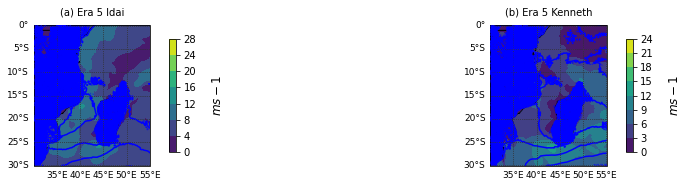

In [3]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]
###ERA 5
# https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html
# https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week8/05_Xarray_TimeSeries.html?highlight=slp
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data='/mnt/g/WRF_Schemes/Era_wrf_data/Era/'   #IAP
#"G:\WRF_Schemes\Era_wrf_data\Era\UV10_mslp_01.nc"
#
#fig=plt.figure(figsize=(18,15),constrained_layout=True)#, dpi=200)
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig.subplots_adjust(wspace=.35)
#fig.tight_layout()
for imonth in np.arange(1,3):  # loop over 2 events 
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fic=rep_data+'eUV10_mslp_'+'{:02d}'.format(imonth)+'.nc'
    ds=xr.open_dataset(fic)
    #ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
    many_times=np.array(['2019-03-15T00:00:00','2019-04-25T15:00:00'],dtype=np.datetime64)
    ds =ds.sel(time=many_times, method='nearest').mean('time')
    print(ds)
    #Read variables
    sp=ds.variables['sp'][:].squeeze()
    u10=ds.variables['u10'][:].squeeze()
    v10=ds.variables['v10'][:].squeeze()
    lon=ds.variables['longitude'][:].squeeze()
    lat=ds.variables['latitude'][:].squeeze()
    
    
    #lat = ds1.variables['lat']
    #lon = ds1.variables['lon']

    #slp1=ds1['SLP'][:,:]  ## eastern pacific nino
    #slp2=ds2['SLP'][:,:]  ## clim
    
    
    # Convert kilopascal to hPa 
    slp = ds.sp/100
    #ax.set_extent([-10.,40.1,30,60],ccrs.PlateCarree())
    print("Pres MIN", np.nanmin(slp), "Pres MAX", np.nanmax(slp))
    # Wind Speed 
    wspd = (u10**2 + v10**2)**0.5
    print("Pres MIN", np.nanmin(wspd), "Pres MAX", np.nanmax(wspd))
    #fig = plt.figure(figsize=(12,12))
    
    #ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
    #ax.set_global()
    ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
    #ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
    #ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
    lons,lats= np.meshgrid(lon,lat)
    levels = np.linspace(-4, 4, 11)
    levels = np.linspace(480, 1040, 200)
    #plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
    plt.contourf(lons, lats, wspd, transform=ccrs.PlateCarree(),cmap='viridis')
    #plt.title('Winter Average Sea Level Pressure Climatology 1980-2020', size=14)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
    cb.set_label('$m s-1$',size=12,rotation=90,labelpad=15)
    msl=plt.contour(lons,lats,slp,levels=levels,transform=ccrs.PlateCarree(),colors='blue')
    
    plt.clabel(msl, inline=1, fontsize=6, fmt="%i")
    #fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)


    # Set the map limits
    #ax.set_xlim(cartopy_xlim(smooth_slp)) #########################################xxxxxxxx
    #ax.set_ylim(cartopy_ylim(smooth_slp))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 

    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)

    #save figures    
    
    
    
   


In [ ]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
#filename_list=[]
for i in range(1980,2021):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list,concat_dim='time')
print(combined_ds)

clim_avg = combined_ds.mean('time')
print(clim_avg['slp'].values)

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=clim_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure Climatology 1980-2020', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [ ]:
file1 = 'EPNino_SeaLevelPressure_detrended_1980-2020.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatology_SeaLevelPressure_detrended.nc'  ##
ds2 = xr.open_mfdataset(file2) 
file3 = 'EPYears_GeospatialHeight_detrended_1980-2020.nc'   ##EP nino
ds3 = xr.open_mfdataset(file3)
file4 = 'Climatological_GeospatialHeight_detrended.nc'  ##climatology
ds4 = xr.open_mfdataset(file4)
    


lat = ds1.variables['lat']
lon = ds1.variables['lon']

slp1=ds1['SLP'][:,:]  ## eastern pacific nino
slp2=ds2['SLP'][:,:]  ## clim
slp = slp1-slp2

gpot1=ds4['H500'][:,:]  ##climatology
#print(wind1)
gpot2=ds3['H500'][:,:]  ##EP nino
gpot=gpot2-gpot1

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Sea Level Pressure Difference (EP Nino vs. Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Pa',size=12,rotation=0,labelpad=15)
plt.contour(lons,lats,gpot,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [ ]:
 
    
    u = ds.u10.sel(month=1).load()
    v = ds.v10.sel(month=1).load()
    #Quiver plots
    #One traditional way to plot the wind data is as vector arrows. We can use a function called quiver() for that:

    ax = plt.axes(projection=ccrs.PlateCarree())  # note that I changed the map projection
    pu, pv = u[::9,::9], v[::9,::9]  # we will discuss what this line does in the cells below
    qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
    ax.coastlines(color='grey');
    
    
    
    
    
    
    # Wind Speed 
    ws = (u10**2 + v10**2)**0.5
    
    msl=ws.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=get_cmap("jet"), extend="max",add_colorbar=False) 
    
    #msl=sp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=get_cmap("jet"), extend="max",add_colorbar=False) 
    #wnspc=plt.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(mslp), 10, 
    #                transform=ccrs.PlateCarree(), cmap=get_cmap("rainbow"))
    #plt.clabel(msl, inline=1, fontsize=10, fmt="%i")

    
    ###########
    gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
    #plt.colorbar(strm.lines)
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    #ax.coastlines(color='grey')#; gl1=ax.gridlines(draw_labels=True);  # what is this line doing?
    #ax.gridlines(draw_labels=True);  # what is this line doing?
    ax.coastlines(color='black', linewidth=0.8);gl.top_labels = gl.right_labels = False
    
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    plt.title(scheme_name[imonth-1],fontsize=10)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 0.1899 0.1899 ... -0.002595
    v10        (latitude, longitude) float32 0.08568 0.08568 ... -0.008725
    sp         (latitude, longitude) float32 1.024e+05 1.024e+05 ... 6.906e+04
Pres MIN 482.53418 Pres MAX 1048.0225
Pres MIN 0.009102244 Pres MAX 24.876217
<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (latitude, longitude) float32 -0.2549 -0.2549 ... 0.7986 0.7986
    v10        (latitude, longitude) float32 -0.08597 -0.08597 ... 0.3818 0.3818
    sp         (latitude, longitu

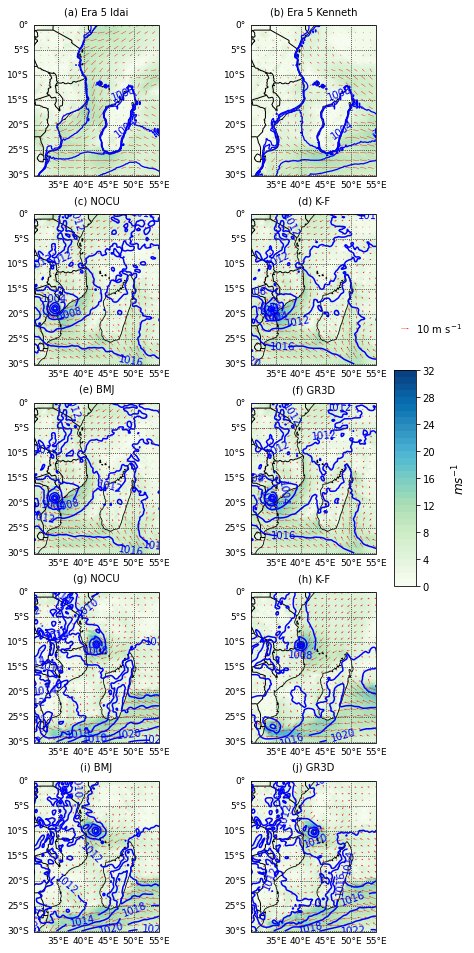

In [2]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]
###ERA 5
# https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html
# https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week8/05_Xarray_TimeSeries.html?highlight=slp
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data='/mnt/g/WRF_Schemes/Era_wrf_data/Era/'   #IAP
#"G:\WRF_Schemes\Era_wrf_data\Era\UV10_mslp_01.nc"
#
#fig=plt.figure(figsize=(18,15),constrained_layout=True)#, dpi=200)
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig.subplots_adjust(wspace=.35)
#fig.tight_layout()
for imonth in np.arange(1,3):  # loop over 2 events 
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fic=rep_data+'eUV10_mslp_'+'{:02d}'.format(imonth)+'.nc'
    ds=xr.open_dataset(fic)
    #ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
    many_times=np.array(['2019-03-15T00:00:00','2019-04-25T15:00:00'],dtype=np.datetime64)
    ds =ds.sel(time=many_times, method='nearest').mean('time')
    print(ds)
    #Read variables
    sp=ds.variables['sp'][:].squeeze()
    u10=ds.variables['u10'][:].squeeze()
    v10=ds.variables['v10'][:].squeeze()
    lon=ds.variables['longitude'][:].squeeze()
    lat=ds.variables['latitude'][:].squeeze()
    
    
    #lat = ds1.variables['lat']
    #lon = ds1.variables['lon']

    #slp1=ds1['SLP'][:,:]  ## eastern pacific nino
    #slp2=ds2['SLP'][:,:]  ## clim
    
    
    # Convert kilopascal to hPa 
    slp = ds.sp/100
    #ax.set_extent([-10.,40.1,30,60],ccrs.PlateCarree())
    print("Pres MIN", np.nanmin(slp), "Pres MAX", np.nanmax(slp))
    # Wind Speed 
    wspd = (u10**2 + v10**2)**0.5
    print("Pres MIN", np.nanmin(wspd), "Pres MAX", np.nanmax(wspd))
    #fig = plt.figure(figsize=(12,12))
    
    #ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
    #ax.set_global()
    ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
    #ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
    #ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
    lons,lats= np.meshgrid(lon,lat)    # Get the latitude and longitude points
    #lats, lons = wrf.latlon_coords(slp)
    # Get the cartopy mapping object
    #cart_proj = get_cartopy(slp)
    # Create a figure
    #fig = plt.figure(figsize=(15,12))
    # Set the GeoAxes to the projection used by WRF
    #ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    #states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #ax.add_feature(states, linewidth=.5)

    #ax.coastlines(color='black');# 


    #ax.coastlines('50m', linewidth=0.8)
    
    
     #plot the geopotential height contour lines
    #ming = int(np.min(ds['sp'].values)/100)
    #maxg = int(np.max(ds['sp'].values)/100)
    
    #mslplevels=[950,960,970,980,990,1000,1010,1020,1030,1040]
    
    clevels = list(np.arange(1004,1032,4))
    #steps= 200 
    
    #print(ming)
    #print(maxg)
    
    
    # Plot MSLP
    #clevmslp = np.arange(800., 1120., 4)
    #cs2 = ax.contour(lons, lats, mslp, clevmslp, colors='k', linewidths=1.25,
     #                linestyles='solid', transform=dataproj)


    # Make the contour outlines for the smoothed sea level pressure.
    contours = plt.contour(lons, lats, slp, clevels, colors="b", linewidths=1.25, transform=crs.PlateCarree())
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
    
    #plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
    
    
    #plot the wind speed using contour fill
    colors=["#f7fcf0","#f2faea","#ecf7e5","#e6f5df","#dff3da","#daf1d5","#d5efcf","#d0edc9",
            "#caeac4","#c1e6bf","#b8e3bb","#aedfb7","#a3dcb6","#96d8ba","#8ad3be","#80cec2",
            "#73c9c6","#64c3ca","#58bdce","#50b6d2","#47add0","#3da3cb","#3499c5","#2c8fc0",
            "#2285bb","#167cb7","#0c73b2","#0869ad","#085fa2","#085497","#084a8c","#084081"]
    
    
    
    levels = list(np.arange(0,33,1))
    
    # Add the wind speed contours
    contourf = plt.contourf(lons, lats, wspd, 10, transform=crs.PlateCarree(),colors=colors,levels=levels, extend='max')
                 #cmap=get_cmap("rainbow"))

    # Add a color bar
    #plt.colorbar(ax=ax, shrink=.8, label=r'ms$^{-1}$')

    #Add wind barbs, only plotting every 15th data point.
    #barbNo=6
    #ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
    #         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

    #Add wind vectors
    #quiverNo=8
    #ax.quiver(lons[::quiverNo,::quiverNo], lats[::quiverNo,::quiverNo],
     #        u10[::quiverNo,::quiverNo],v10[::quiverNo,::quiverNo], 
     #        transform=crs.PlateCarree(),headwidth=4,color='k')
    
    
    
    u = ds.u10
    v = ds.v10  
    widths=12

    #ax = plt.axes(projection=ccrs.PlateCarree())  # note that I changed the map projection
    pu, pv = u[::6,::6], v[::6,::6]  # we will discuss what this line does in the cells below
    qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, pivot='middle', \
                   transform=ccrs.PlateCarree(),headaxislength=2,\
                    headwidth=4, width=0.003, color='r', scale=1/0.006)
    
    
    



    # Set the map limits
    #ax.set_xlim(cartopy_xlim(smooth_slp)) #########################################xxxxxxxx
    #ax.set_ylim(cartopy_ylim(smooth_slp))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 


    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)

####Idai
##############################Kenneth      
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Idai/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data= '/mnt/g/WRF_Schemes/Era_wrf_data/Kenneth/' #IAP
#"G:\WRF_Schemes\Era_wrf_data\Idai\wrfout_d01_03.nc"
#fig3=plt.figure(figsize=(18,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig3.subplots_adjust(hspace=0.3, wspace=.0005)
#fig.tight_layout()
#fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
for imonth in np.arange(3,7):  # loop over 12 months
    #fig=plt.figure(figsize=(12,10))
    #ax1.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    #fig3=plt.figure(figsize=(18,15))#,
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fnc=rep_data+'wrfout_d01_'+'{:02d}'.format(imonth)+'.nc'
    ncfile=Dataset(fnc) #          
    
    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    #slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    #smooth_slp = smooth2d(slp, 5)



    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_slp = smooth2d(slp, 3)

    #get wind speed and components
    wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
    #wspd = wspd[time_slice_1]

    u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
    #u10 = u10[time_slice_1]

    v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
    #v10 = v10[time_slice_1]


    # Get the latitude and longitude points
    lats, lons = wrf.latlon_coords(slp)
    # Get the cartopy mapping object
    cart_proj = get_cartopy(slp)
    # Create a figure
    #fig = plt.figure(figsize=(15,12))
    # Set the GeoAxes to the projection used by WRF
    #ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    #states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #ax.add_feature(states, linewidth=.5)

    #ax.coastlines(color='black');# 


    #ax.coastlines('50m', linewidth=0.8)

    # Make the contour outlines for the smoothed sea level pressure.
    contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
                transform=crs.PlateCarree())
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
    
    levels = list(np.arange(0,33,1))
    # Add the wind speed contourf
    contourf = plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),colors=colors,levels=levels)
                 #cmap=get_cmap("rainbow"))

    # Add a color bar
    #plt.colorbar(ax=ax, shrink=.8)

    #Add wind barbs, only plotting every 15th data point.
    #barbNo=6
    #ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
    #         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

    #Add wind vectors
    quiverNo=6
    ax.quiver(to_np(lons[::quiverNo,::quiverNo]), to_np(lats[::quiverNo,::quiverNo]),
             to_np(u10[::quiverNo,::quiverNo]),to_np(v10[::quiverNo,::quiverNo]), 
             transform=crs.PlateCarree(),headwidth=4,color='r',regrid_shape=20) 



    # Set the map limits
    #ax.set_xlim(cartopy_xlim(smooth_slp)) #########################################xxxxxxxx
    #ax.set_ylim(cartopy_ylim(smooth_slp))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 



    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)


##############################Kenneth      
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Kenneth/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data= '/mnt/g/WRF_Schemes/Era_wrf_data/Kenneth/' #IAP
#"G:\WRF_Schemes\Era_wrf_data\Idai\wrfout_d01_03.nc"
#fig3=plt.figure(figsize=(18,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig3.subplots_adjust(hspace=0.3, wspace=.0005)
#fig.tight_layout()
#fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
for imonth in np.arange(7,11):  # loop over 12 months
    #fig=plt.figure(figsize=(12,10))
    #ax1.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    #fig3=plt.figure(figsize=(18,15))#,
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fnc=rep_data+'wrfout_d01_'+'{:02d}'.format(imonth)+'.nc'
    ncfile=Dataset(fnc) #          
    
    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    #slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    #smooth_slp = smooth2d(slp, 5)



    #ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
    # Get the Sea Level Pressure
    slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
    #slp = slp[time_slice_1]
    # Smooth the sea level pressure since it tends to be noisy near the mountains
    smooth_slp = smooth2d(slp, 3)

    #get wind speed and components
    wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
    #wspd = wspd[time_slice_1]

    u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
    #u10 = u10[time_slice_1]

    v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
    #v10 = v10[time_slice_1]


    # Get the latitude and longitude points
    lats, lons = wrf.latlon_coords(slp)
    # Get the cartopy mapping object
    cart_proj = get_cartopy(slp)
    
    #cen_lat, cen_lon = ncfile.CEN_LAT, ncfile.CEN_LON
    #truelat1, truelat2, STAND_LON = nc.TRUELAT1, nc.TRUELAT2, nc.STAND_LON
    #pole_lat, pole_lon = nc.POLE_LAT, nc.POLE_LON

    ### Create earth-rotated Dataset
    # https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.uvmet.html
    #cone = 1 # ???
    #uv   = wrf.uvmet(u10, v10, u10.XLONG, u10.XLAT, 
    #                     cen_lon, cone, meta=True, units='m s-1')    
    
    
    
    
    # Create a figure
    #fig = plt.figure(figsize=(15,12))
    # Set the GeoAxes to the projection used by WRF
    #ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    #states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #ax.add_feature(states, linewidth=.5)

    #ax.coastlines(color='black');# 


    #ax.coastlines('50m', linewidth=0.8)

    # Make the contour outlines for the smoothed sea level pressure.
    contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
                transform=crs.PlateCarree())
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
    levels = list(np.arange(0,33,1))
    # Add the wind speed contourf
    contourf = plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),colors=colors, levels=levels)
                 #cmap=get_cmap("rainbow"))

    # Add a color bar
    #plt.colorbar(ax=ax, shrink=.8)

    #Add wind barbs, only plotting every 15th data point.
    #barbNo=6
    #ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
    #         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

    #Add wind vectors
    quiverNo=6
    Q=ax.quiver(to_np(lons[::quiverNo,::quiverNo]), to_np(lats[::quiverNo,::quiverNo]),
             to_np(u10[::quiverNo,::quiverNo]),to_np(v10[::quiverNo,::quiverNo]), 
             transform=crs.PlateCarree(),headwidth=4,color='r',regrid_shape=20) 
    
    
    
    # Add arrows to show the wind vectors !!!!
    #x = u10.XLONG.values
    #y = u10.XLAT.values
    #u = uv[0].values
    #v = uv[1].values
    #linewidths=(2,), edgecolors=('k'), headaxislength=5  width=0.022, scale=1/0.15
    
    #Q = plt.quiver( x, y, u, v, 
    #               pivot='middle', 
    #               transform=ccrs.PlateCarree(),
    #               headwidth=4,
    #               color='b',
    #               regrid_shape=20 
     #              )



    # Set the map limits
    #ax.set_xlim(cartopy_xlim(smooth_slp)) #########################################xxxxxxxx
    #ax.set_ylim(cartopy_ylim(smooth_slp))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 



    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
                    wspace=0.35)    
    
qk = plt.quiverkey(Q, 
                   1.26, 3.99,                  # x,y label position
                   10, '10 m s$^{-1}$', # choose units + update string headwidth=2 #str(10)+' '+u10.units,
                   labelpos='E',                # add label to the right
                   coordinates='axes',
                   fontproperties={'size': 10}
                   )          
# Add colorbar
#cbarD = plt.colorbar(mm, spacing='proportional', ticks=clevs, boundaries=clevs, pad="2%")
##mfc_level=np.arange(-0.08,0.1,0.02)
# Add colorbar
#cbarD = m.colorbar(plotPR1, spacing='proportional', ticks=clev_PR, boundaries=clev_PR, pad="2%")

fig.subplots_adjust(right=0.6)
#cbar_ax = fig.add_axes([0.65, 0.15, 0.02, 0.7])
cbar_ax = fig.add_axes([0.6, 0.40, 0.02, 0.2])
#fig.colorbar(pc, cax=cbar_ax, label='Hourly rainfall sum in mm');



#cbarD = m.colorbar(plotPR1, spacing='proportional', ticks=clev_PR, boundaries=clev_PR, pad="2%")
#cbar_ax = fig.add_axes([0.55, 0.40, 0.01, 0.2])
cbar = plt.colorbar(contourf, cax=cbar_ax, shrink=.42, extend='max')
cbar.cmap.set_over("#084081")
#cbar = plt.colorbar(ax=ax, shrink=.8, label=r'ms$^{-1}$', extend='max')
#cbar = contourf.colorbar(contourf, spacing='proportional', ticks=clev_PR, boundaries=clev_PR, pad="2%")
#cbar=fig.colorbar(strm.lines, cax=cbar_ax,orientation='vertical', shrink=1.25, extend='max')
cbar.set_label('$ ms^{-1}$',size=12,rotation=90,labelpad=15) #, rotation=90, fontsize=10)
#cbar.set_label('label=r'ms$^{-1}$', rotation=90,labelpad=10, fontsize=10)
#cbar.set_clim(0,50)
#cbar.ax.tick_params(labelsize=10) 
#cbar.ax.yaxis.get_offset_text().set(size=10) 


#save figures    
rep_data1='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Plots/' 
year='2019'
#plt.tight_layout(pad=4.5, h_pad=1.0, w_pad=1.0)        # To adjust spacing between subplots and inside the figure
plt.savefig(rep_data1+'Idai_Ken_mslp_wspd'+year+'.png', bbox_inches='tight',dpi=200) #'monmean_SRF.'+year+month+'.
plt.savefig(rep_data1+'Idai_Ken_mslp_wspd'+year+'.pdf', bbox_inches='tight',dpi=200)
plt.show() 
    


In [1]:
#plot the geopotential height contour lines
    ming = int(np.min(ds['geopot_height'].sel(isobaricInhPa = i).values)/10) #use dam units for geopotential height
    maxg = int(np.max(ds['geopot_height'].sel(isobaricInhPa = i).values)/10)
        
    cs = plt.contour(ds.longitude, ds.latitude, 
                     ds['geopot_height'].sel(isobaricInhPa = i,time=j)/10,
                     levels=np.arange(ming, maxg, steps), colors='grey')
    cs.clabel(fontsize=12, inline=1, fmt='%.f')

    #plot the wind speed using contour fill
    colors=["#f7fcf0","#f2faea","#ecf7e5","#e6f5df","#dff3da","#daf1d5","#d5efcf","#d0edc9",
            "#caeac4","#c1e6bf","#b8e3bb","#aedfb7","#a3dcb6","#96d8ba","#8ad3be","#80cec2",
            "#73c9c6","#64c3ca","#58bdce","#50b6d2","#47add0","#3da3cb","#3499c5","#2c8fc0",
            "#2285bb","#167cb7","#0c73b2","#0869ad","#085fa2","#085497","#084a8c","#084081"
           ] # https://react-colorscales.getforge.io/ for color hex codes; cmap='GnBu'
    levels = list(np.arange(0,33,1))
    #levels = list(np.arange(0,33,1))
    
    cw = plt.contourf(ds.longitude, ds.latitude, ds['wind_speed'].sel(isobaricInhPa = i,time=j),
                      colors=colors, levels=levels, extend='max')
    plt.colorbar(cw, shrink=0.8, label=r'ms$^{-1}$')

IndentationError: unexpected indent (2338639252.py, line 2)

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from pythia_datasets import DATASETS


filepath = DATASETS.fetch('CESM2_sst_data.nc')
data = xr.open_dataset(filepath)
filepath2 = DATASETS.fetch('CESM2_grid_variables.nc')
areacello = xr.open_dataset(filepath2).areacello

ds = xr.merge([data, areacello])
ds

ModuleNotFoundError: No module named 'pythia_datasets'

In [68]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import pandas as pd  # new package! this is the package at the base of xarray
import io, requests
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

ds = xr.open_mfdataset('/mnt/h/OLR/olr-daily_v01r02_*.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 15706, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lon          (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat          (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time         (time) datetime64[ns] 1979-01-01T12:00:00 ... 2021-12-31T12:...
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 dask.array<chunksize=(365, 180, 360), meta=np.ndarray>
    lon_bounds   (time, lon, bnds) float32 dask.array<chunksize=(365, 360, 2), meta=np.ndarray>
    lat_bounds   (time, lat, bnds) float32 dask.array<chunksize=(365, 180, 2), meta=np.ndarray>
    time_bounds  (time, bnds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
Attributes: (12/46)
    conventions:                CF-1.6
    title:                      Daily OLR CDR Product Ver01Rev02
    source:                     NOAA Archive of HIRS L1B data from TIROS-N Se...
    reference:                  doi:10.1175/2007JTECHA989.1  doi:10.1175/1520...
    history:                    2014-06-10T18:57:59Z - generated by software ...
    comment:                    Final TCDR
    ...                         ...
    software_version_id:        Ver01Rev02
    Metadata_Link:              gov.noaa.ncdc:C00875
    product_version:            Ver01Rev02
    platform:                   TIROS-N > Television Infrared Observation Sat...
    sensor:                     HIRS-2 > High Resolution Infra-red Sounder/2,...
    spatial_resolution:         1.0 by 1.0 degree equal angle

In [79]:
ds = ds.sel(lat=slice(-50, 5), lon=slice(20, 100)).sel(time=slice('2010-01-01','2020-12-31')).dropna("time")
#ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
#ds = ds.sel(lat=slice(-50, 5), lon=slice(20, 100)).sel(time=slice('2020-01-01', '2020-12-31')) .dropna("time")
#Daily Average
olr_da = ds.olr.load().groupby('time.dayofyear').mean(dim='time')
olr_std = ds.olr.load().groupby('time.dayofyear').std(dim='time')

#Smooth the mean with a 5-day running mean
olr_da_rolling_mean = olr_da.rolling(dayofyear=5,center=True).mean()

olr_da = ds.olr.groupby('time.month')
olr_anom = olr_da - olr_da.mean(dim='time')

#olr_anom_weight = olr_anom.weighted(ds).mean(dim=['lat', 'lon'])

weights = np.cos(np.deg2rad(olr_anom.lat))
weights.name = "weights"
print(weights)

#print(olr_anom)

#index_nino34 = tos_nino34_anom.weighted(tos_nino34.areacello).mean(dim=['lat', 'lon'])




'''

olr_da.plot(size=8)
olr_da_rolling_mean.plot()
plt.legend(['mean', '5-day running mean ']);

#Monthly Average
olr_ma = ds.olr.load().groupby('time.month').mean(dim='time')
#Smooth the mean with a 5-month running mean¶
olr_ma_rolling_mean = olr_ma.rolling(month=5,center=True).mean()

print(olr_ma)
print(olr_ma_rolling_mean)

olr_ma.plot(size=8)
olr_ma_rolling_mean.plot()
plt.legend(['mean', '5-month running mean ']);

#Seasonal Average

olr_sa = ds.olr.load().groupby('time.season').mean(dim='time')
#Smooth the mean with a 5-month running mean¶
olr_sa_rolling_mean = olr_sa.rolling(season=5,center=True).mean()
olr_sa.plot(size=8)
olr_sa_rolling_mean.plot()
plt.legend(['mean', '5-season running mean ']);#olr_da
#olr_ma
olr_sa
'''

<xarray.DataArray 'weights' (lat: 55)>
array([0.64944804, 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.8038569 , 0.8141155 ,
       0.8241262 , 0.83388585, 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -49.5 -48.5 -47.5 -46.5 -45.5 ... 0.5 1.5 2.5 3.5 4.5
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north
    

"\n\nolr_da.plot(size=8)\nolr_da_rolling_mean.plot()\nplt.legend(['mean', '5-day running mean ']);\n\n#Monthly Average\nolr_ma = ds.olr.load().groupby('time.month').mean(dim='time')\n#Smooth the mean with a 5-month running mean¶\nolr_ma_rolling_mean = olr_ma.rolling(month=5,center=True).mean()\n\nprint(olr_ma)\nprint(olr_ma_rolling_mean)\n\nolr_ma.plot(size=8)\nolr_ma_rolling_mean.plot()\nplt.legend(['mean', '5-month running mean ']);\n\n#Seasonal Average\n\nolr_sa = ds.olr.load().groupby('time.season').mean(dim='time')\n#Smooth the mean with a 5-month running mean¶\nolr_sa_rolling_mean = olr_sa.rolling(season=5,center=True).mean()\nolr_sa.plot(size=8)\nolr_sa_rolling_mean.plot()\nplt.legend(['mean', '5-season running mean ']);#olr_da\n#olr_ma\nolr_sa\n"

In [54]:
#Select area, time and drop NaNs
ds = ds.sel(lat=slice(-50, 5), lon=slice(20, 100)).sel(time=slice('2020-01-01', '2020-12-31')) .dropna("time")
#ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
#Daily Average
olr_da = ds.olr.load().groupby('time.dayofyear').mean(dim='time')


olr_da.to_netcdf('/mnt/h/OLR/olr_da_compressed.nc', encoding=ds.encoding.update({'zlib': True, 'complevel': 4}))
# Apply a 3-month smoothing window
#nino34 = olr_da.rolling(time=3, min_periods=3, center=True).mean()
# Select the ERA5 period
#nino34 = nino34.sel(time=slice('1979', '2018'))

# This uses a series of tricks to come to the goal
#t2m_djf = ds.olr.load().where(ds['time.season'] == 'DJF')
#t2m_djf = ds.rolling(5, center=True, time=1).mean()
#t2m_djf = t2m_djf.groupby('time.dayofyear').mean('time')
#t2m_djf
#roll1 = olr_da.roll(dayofyear=150).rolling(dayofyear=31, center=True).mean()
#roll2 = olr_da.rolling(dayofyear=31, center=True).mean()
#sol2 = xr.concat([roll1, roll2], dim='r').mean('r')
#sol2

#daily = ds.groupby('time.dayofyear').mean()
#daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
#plt.ylabel('mean hourly count');


# This uses a series of tricks to come to the goal
t2m_djf = ds.olr.load().where(ds['time.season'] == 'DJF')
t2m_djf = t2m_djf.rolling(min_periods=3, center=True, time=3).mean()
t2m_djf = t2m_djf.groupby('time.year').mean('time')
t2m_djf

In [81]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
from pythia_datasets import DATASETS
# viewing the dataset
#print(olr_da.head(1))

ModuleNotFoundError: No module named 'pythia_datasets'

In [ ]:
#Compute monthly climatology¶
#Compute the monthly climo for area averaged total SST from Niño 3.4 region, and subtract climatology from area averaged total SST time series to obtain anomalies

gb = tos_nino34.tos.groupby('time.month')
tos_nino34_anom = gb - gb.mean(dim='time')
index_nino34 = tos_nino34_anom.weighted(tos_nino34.areacello).mean(dim=['lat', 'lon'])
#Smooth the anomalies with a 5-month running mean¶
index_nino34_rolling_mean = index_nino34.rolling(time=5,center=True).mean()
index_nino34.plot(size=8)
index_nino34_rolling_mean.plot()
plt.legend(['anomaly', '5-month running mean anomaly']);